In [108]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import font_manager

In [8]:
%matplotlib inline

### preparing data

In [2]:
data = pd.read_csv('Pearson.tsv', sep='\t')

In [3]:
data.head()

,Father,Son
0,65.0,59.8
1,63.3,63.2
2,65.0,63.3
3,65.8,62.8
4,61.1,64.3


these are the points where the data will be divided into segments: three segments between four points

In [81]:
dividers = pd.DataFrame({'Father': [0, 65, 70, 100], 'Son': [0, 65, 70, 100]})
dividers

,Father,Son
0,0,0
1,65,65
2,70,70
3,100,100


### setting font

In [122]:
!curl https://www.fontsquirrel.com/fonts/download/1942-report > font.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 31041  100 31041    0     0  32368      0 --:--:-- --:--:-- --:--:-- 32334


In [136]:
!unzip -p font.zip 1942.ttf > font.ttf

In [137]:
!ls

font.ttf  font.zip  hw.ipynb  Pearson.tsv


In [138]:
font_manager.fontManager.addfont('font.ttf')

In [164]:
plt.rcParams['font.family'] = 'serif'

### plotting

idk how to use this for proving normal distribution but i did what was said

In [95]:
# function for plotting a single histogram
def plot_hist(ax, i, axis='Father', ornt='vertical'):
    seg = data[axis] # relevant series
    seg = seg[(dividers[axis][i - 1] <= seg) & (seg < dividers[axis][i])] # relevant segment
    ax.hist(seg, color='purple', orientation=ornt)

    if ornt=='vertical':
        ax.set_xlabel(axis)
        ax.set_ylabel('count')
    else:
        ax.set_ylabel(axis)
        ax.set_xlabel('count')

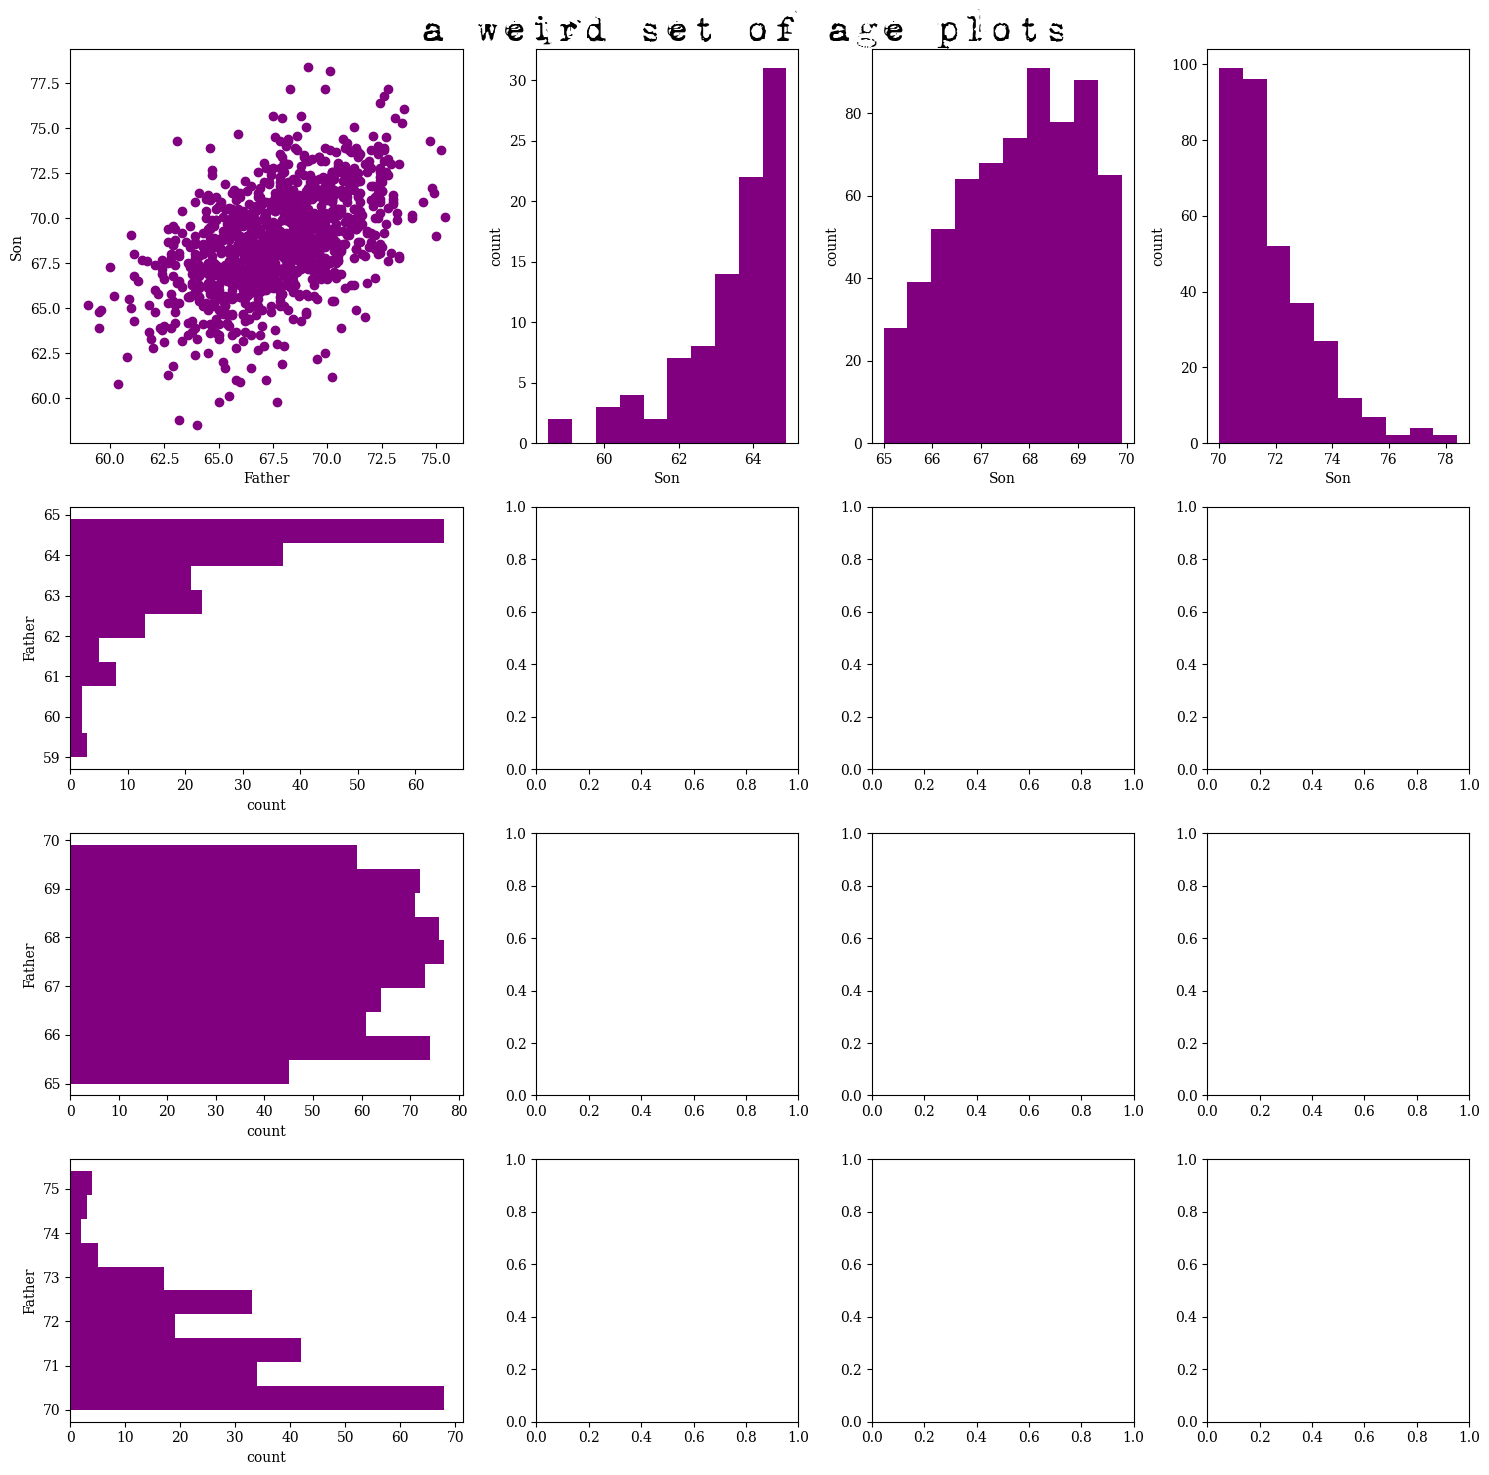

In [171]:
fig, axis = plt.subplots(4, 4, figsize=(15, 15),
                         gridspec_kw={'width_ratios': [1.5, 1, 1, 1],
                                      'height_ratios': [1.5, 1, 1, 1]})
fig.suptitle('a weird set of age plots', fontname='1942 report', fontsize=30)
axis[0, 0].scatter(data['Father'], data['Son'], color='purple')
axis[0, 0].set_xlabel('Father')
axis[0, 0].set_ylabel('Son')

for i in range(1, 4):
    plot_hist(axis[i, 0], i, ornt='horizontal')
    plot_hist(axis[0, i], i, axis='Son')

fig.tight_layout()
plt.savefig('fig.png')
plt.show()

present day present time